### ANÁLISIS DE DATOS CON PANDAS

**Dataframe ?** Es un estructura de datos ampliamente usada. Un data frame tiene dos dimensiones de Arrays. Un dataframe tambien tiene dos tipos de indices, column-index y row-index.

Es muy común crear los DataFrames con diccionarios.

In [1]:
import pandas as pd

#### Lectura de datos sobre el ejemplo de registro y guardado en archivo tipo json 

In [ ]:
## Read in the data json file
file_path = './files/students.json'
data = pd.read_json(file_path)
data.head()

,id,nombre,apellido,edad,carrera
0,1,Juan,Fernandez,10,educacion
1,2,Gabriela,Zambrano,18,contaduria
2,3,Andres,Ponnefz,17,biologia
3,4,Jesus,Portillo,15,biologia
4,5,Carlos,Centeno,28,ing de sistemas


### Filtros y mascaras en pandas

In [3]:
mascaras = data['edad'] >= 18
mayores_edad = data[data['edad'] >= 18]
mayores_edad.head()

,id,nombre,apellido,edad,carrera
1,2,Gabriela,Zambrano,18,contaduria
4,5,Carlos,Centeno,28,ing de sistemas
5,6,Joshua,Rodriguez,38,biologia
6,7,Arturo,Morales,38,Meaestria en tecnologia


---


#### Leamos un archivo con pandas tipo CSV

students file .csv

In [4]:
file_student = './files/exams.csv'
student_data = pd.read_csv(file_student)
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


---

In [5]:
#simular valores nulos
# para simular vamos a agregar una nueva columna con valores nulos

student_data["Age"] = None

In [6]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Age
0,male,group A,high school,standard,completed,67,67,63,None
1,female,group D,some high school,free/reduced,none,40,59,55,None
2,male,group E,some college,free/reduced,none,59,60,50,None
3,male,group B,high school,standard,none,77,78,68,None
4,male,group E,associate's degree,standard,completed,78,73,68,None


In [7]:
## Que columnas tengo sobre mi datraFrame

print(f"total columnas {len(student_data.columns)} nombres de columnas {list(student_data.columns)}")

# Identificar las columnas con las que voy a trabajar ()
print("\n *************** \n")
## Identificar los valores nulos
print(f"Valores null totales:\n{student_data.isnull().sum()}\n")

## Tamano del DataFrame

print(f"Tamano del DataFrame:\n{student_data.shape}\n")

## Describir el DataFrame
print(f"Descripcion del DataFrame:\n{student_data.describe()}\n")

# Identificar tipos de datos

print(f"Tipos de datos:\n{student_data.dtypes}")

total columnas 9 nombres de columnas ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'Age']

 *************** 

Valores null totales:
gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
Age                            1000
dtype: int64

Tamano del DataFrame:
(1000, 9)

Descripcion del DataFrame:
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.00

In [8]:
import random

student_data["math score"].max()



lista_edades = [str(random.randint(0,99)) for _ in range(0,len(student_data))]
# Slicing en listas
print(lista_edades[:5])

student_data["Age"] = lista_edades


['99', '78', '33', '9', '37']


In [9]:
### Verificar las edades 

student_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
Age                            object
dtype: object

In [10]:
### Cambiar el tipo de dato de la columna Age a un valor numerico 
student_data["Age"] = student_data["Age"].astype(int)

#student_data["Age"] = pd.to_numeric(student_data["Age"], errors='coerce')
student_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
Age                             int64
dtype: object

In [11]:
## 
new_student_data = student_data[["Age", "math score", "reading score", "writing score"]]
new_student_data.head()

### Identificar los estudiantes mayores de edad y los menores de edad

mask = new_student_data["Age"] >= 18
#print(f"Estudiantes mayores de edad:\n{mask}\ntipo de dato: {type(mask)}")
mask_menores_edad = new_student_data["Age"] < 18    

mayores_edad = new_student_data[mask]
menores_edad = new_student_data[~mask] #new_student_data[mask_menores_edad]
mayores_edad.head()

,Age,math score,reading score,writing score
0,99,67,67,63
1,78,40,59,55
2,33,59,60,50
4,37,78,73,68
5,29,63,77,76


In [12]:
len(mayores_edad), len(new_student_data), len(menores_edad)

(821, 1000, 179)

---

Usuarios bancos,

Que pasa si nuestros datos vienen en formato CSV pero separados por otros caracteres diferentes a la ,

In [13]:
bank_data = pd.read_csv('./files/bank.csv', sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
mascara = bank_data['education'] == "primary"

bank_data["boolean_data_education"] = mascara

primary_education_data = bank_data[mascara]

primary_education_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,boolean_data_education
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,True
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no,True
26,55,blue-collar,married,primary,no,627,yes,no,unknown,5,may,247,1,-1,0,unknown,no,True
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes,True


In [15]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,boolean_data_education
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,False
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,False
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,False
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,False


In [16]:
primary_education_data.dtypes

age                        int64
job                       object
marital                   object
education                 object
default                   object
balance                    int64
housing                   object
loan                      object
contact                   object
day                        int64
month                     object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
y                         object
boolean_data_education      bool
dtype: object

In [17]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Revisar columnas

In [18]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'boolean_data_education'],
      dtype='object')

In [19]:
mascara = bank_data['month'] == "oct"
data_per_month = bank_data[mascara]
#data_per_month.head()

describe_data = data_per_month.describe()

data_per_month['mes'] = "octubre"

data_per_month.head()


#loc permite seleccionar filas y columnas por etiquetas o condición
#iloc permite seleccionar filas y columnas por índices

C:\Users\CristiamAlbertoLoaiz\AppData\Local\Temp\ipykernel_27288\1455039316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_month['mes'] = "octubre"


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,boolean_data_education,mes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True,octubre
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes,True,octubre
61,63,retired,married,secondary,no,415,yes,no,cellular,7,oct,323,1,-1,0,unknown,no,False,octubre
64,56,admin.,married,secondary,no,16873,no,no,cellular,7,oct,223,1,-1,0,unknown,no,False,octubre
97,30,admin.,single,tertiary,no,261,no,no,cellular,19,oct,233,1,137,20,failure,no,False,octubre


In [20]:
bank_data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [21]:
# escoger 4 columnas y guardarlas en un nuevo dataframe

new_bank_data = bank_data[['age', 'job', 'marital', 'education']]
new_bank_data.to_csv('./files/new_bank_data.csv', sep=',')

In [22]:
#bank_data["age"]=bank_data['age'].astype('str')
#
#bank_data.dtypes

In [23]:
primary_education_data.to_csv('./files/primary_education_data.csv', index=False, sep=',')

In [24]:
type(primary_education_data["job"])

pandas.core.series.Series

In [25]:
#import csv
#
#with open('./files/bank.csv', 'r') as f:
#    reader = csv.reader(f)
#    for row in reader:
#        print(row[0])

In [26]:
## save with pandas to csv
bank_data.to_csv('./files/bank_pandas.csv')

In [27]:
len(student_data)

1000

In [28]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Age'],
      dtype='object')

In [29]:
student_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
Age                             int64
dtype: object

### Data operation

Cualquier columna o fila del DataFrame puede ser seleccionada pasandole el nombre de las columnas y filas. Despues de seleccionar una desde el DataFrame, esta columna/fila seleccionada es uni-dimensional y es considerada como una serie.

In [30]:
ethnicity = student_data["race/ethnicity"]

print(f"type data {type(ethnicity)}")

ethnicity.head()

type data <class 'pandas.core.series.Series'>


0    group A
1    group D
2    group E
3    group B
4    group E
Name: race/ethnicity, dtype: object

### Filter data

Los datos pueden ser filtrados 

In [31]:
### only ethnicity group D

group_D_ethnicity = student_data[student_data["race/ethnicity"] == "group D"]

group_D_ethnicity.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Age
1,female,group D,some high school,free/reduced,none,40,59,55,78
5,female,group D,high school,standard,none,63,77,76,29
8,male,group D,high school,standard,none,63,56,65,86
11,female,group D,high school,standard,completed,80,87,90,32
12,male,group D,associate's degree,standard,completed,77,87,85,6


### Null values



In [32]:
student_data["gender"][0] = None

C:\Users\CristiamAlbertoLoaiz\AppData\Local\Temp\ipykernel_27288\2397718550.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  student_data["gender"][0] = None
C:\Users\CristiamAlbertoLoaiz\AppData\Local\Temp\ipykernel_27288\2397718550.py:1

In [33]:
student_data.isnull().sum()

gender                         1
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Age                            0
dtype: int64

In [34]:
student_data.head()
print(f"student_data shape {student_data.shape}")

student_data shape (1000, 9)


In [35]:
student_data["gender"].unique()

array([None, 'female', 'male'], dtype=object)

In [36]:
## graph the data
student_data['gender'].isnull().head()


0     True
1    False
2    False
3    False
4    False
Name: gender, dtype: bool

----

### Count values

Pandas con el metodo *value_counts()* muestra el total de ocurrencias de los eventos (datos)

In [37]:
list(student_data.columns)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Age']

In [38]:
student_data['race/ethnicity'].value_counts().head()

race/ethnicity
group C    323
group D    262
group B    205
group E    131
group A     79
Name: count, dtype: int64

In [39]:
student_data['gender'].value_counts().head()

gender
male      516
female    483
Name: count, dtype: int64

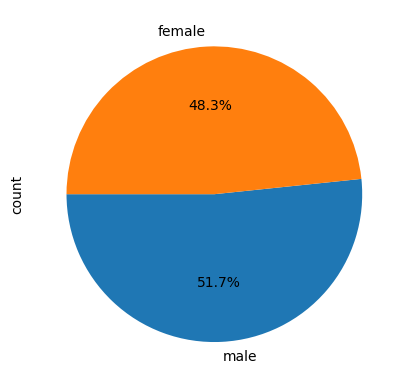

In [40]:
plt_data_student =student_data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180)

plt_data_student.get_figure().savefig("img.png")



In [41]:
student_data['race/ethnicity'].unique(), len(student_data)

(array(['group A', 'group D', 'group E', 'group B', 'group C'],
       dtype=object),
 1000)

<Axes: ylabel='race/ethnicity'>

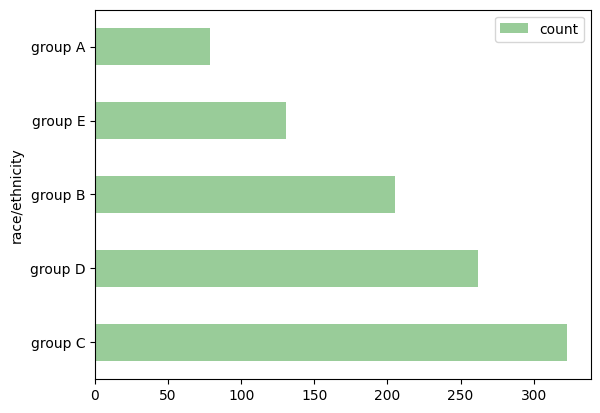

In [42]:
student_data['race/ethnicity'].value_counts().plot(kind='barh', color='green', alpha=0.4, legend=True)

### Group by with columns - names

<Axes: ylabel='count'>

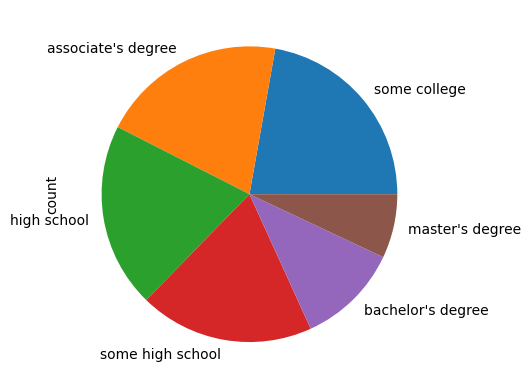

In [43]:
student_data['parental level of education'].value_counts().plot(kind='pie')

<Axes: xlabel='race/ethnicity'>

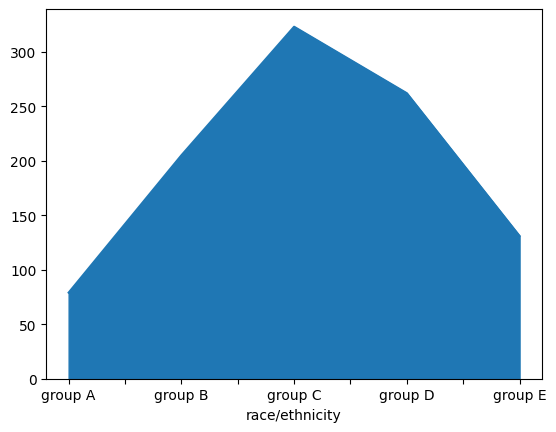

In [44]:
sg = student_data.groupby(['race/ethnicity']).size()
sg.plot(kind='area')

In [45]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,boolean_data_education
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,False
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,False
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,False
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,False


<Axes: ylabel='count'>

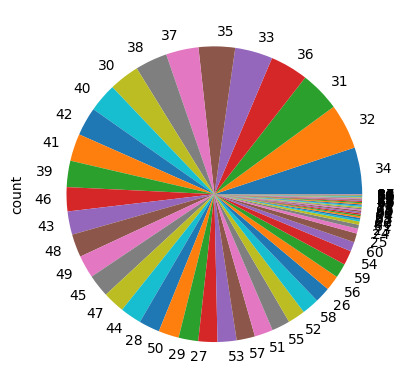

In [46]:
### Tipo grafica balance

bank_data['age'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

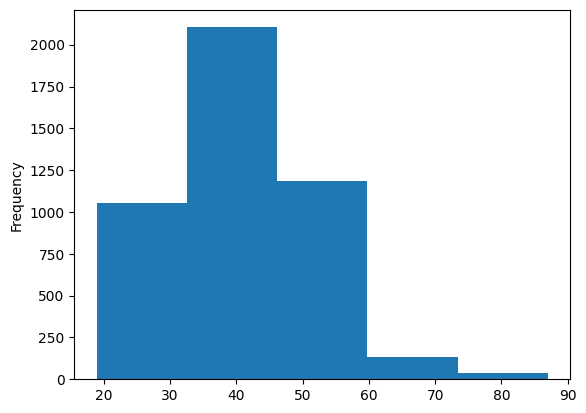

In [47]:
bank_data['age'].plot(kind='hist', bins=5)

---
---

### Group by

Agrupar  - datos y poder operarlos más fácil

In [48]:
import pandas as pd
bank_data = pd.read_csv('./files/bank.csv', sep=';')

In [49]:
#bank_data = read_csv(ruta_donde_esta_el_archivo)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


La función unstack en pandas se usa para convertir niveles de índice en columnas, reorganizando los datos de un formato apilado (stacked) a un formato más amplio (wide). Cuando usas groupby en pandas, el resultado es un DataFrame con índices jerárquicos (o MultiIndex), y unstack ayuda a "deshacer" uno de esos niveles de índice, convirtiéndolo en columnas

In [50]:
### Que valores unicos tengo 

bank_data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

### Condiciones para agrupar:
- Datos categoricos = Datos que me sirven para clasificar. (casado, soltero, divorciado, aburrido, ... )
- prohibido agrupar datos númericos - totalmente dispersos.
- Si los datos númericos tienen categoría, si lo podría agrupar (0,1,2,3)

In [51]:
bank_data.groupby(['job','contact']).size().unstack(fill_value=0)

contact,cellular,telephone,unknown
job,,,
admin.,316,31,131
blue-collar,491,56,399
entrepreneur,105,13,50
housemaid,66,17,29
management,711,51,207
retired,145,42,43
self-employed,116,5,62
services,236,28,153
student,62,9,13


In [52]:
len(bank_data)

4521

<Axes: xlabel='job,education'>

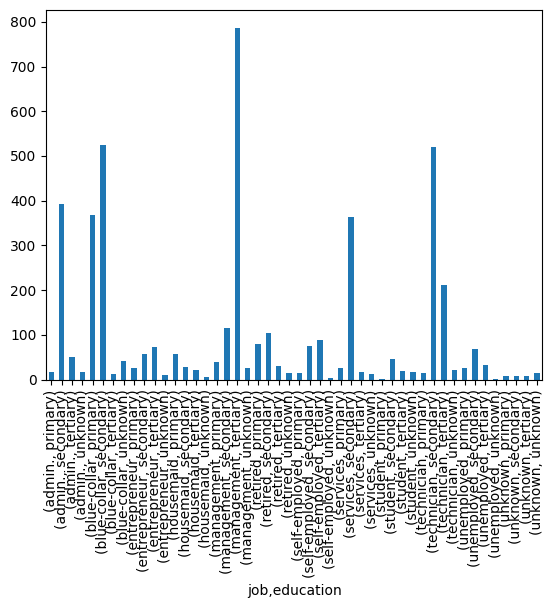

In [53]:
### NO es la mejor forma de hacerlo - grafica de barras
bank_data.groupby(['job','education']).size().plot(kind='bar')

In [54]:
agrupacion_trabajos = bank_data.groupby(['job','education']).size().unstack(fill_value=0)
agrupacion_trabajos.tail(20)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,17,393,51,17
blue-collar,369,524,12,41
entrepreneur,26,58,73,11
housemaid,57,28,22,5
management,39,116,787,27
retired,80,105,31,14
self-employed,15,76,88,4
services,25,363,16,13
student,2,47,19,16


<Axes: xlabel='job'>

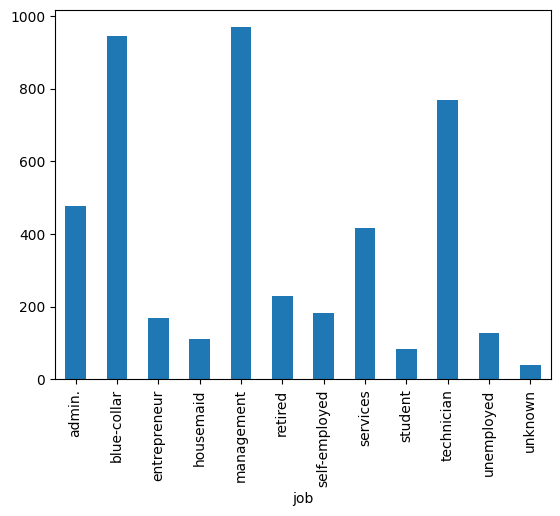

In [55]:
bank_data.groupby(['job']).size().plot(kind='bar')

In [56]:
## group by job
#group_by_job = bank_data.groupby(['job']).size().plot(kind='bar')

group_by_job = bank_data.groupby(['job', 'marital','housing','education']).size().unstack(fill_value=0)
group_by_job.head(30)
#SQL

education                      primary  secondary  tertiary  unknown
job          marital  housing                                       
admin.       divorced no             2         21         0        3
                      yes            1         37         3        2
             married  no             4         76        13        5
                      yes            8        142        14        4
             single   no             1         37        12        2
                      yes            1         80         9        1
blue-collar  divorced no            13         11         0        2
                      yes           24         26         0        3
             married  no            87         74         3        9
                      yes          197        303         0       20
             single   no            11         35         3        3
                      yes           37         75         6        4
entrepreneur divorced no             1          1         5        0
                      yes            1          4         3        1
             married  no             9         20        23        5
                      yes           13         25        32        5
             single   no             0          6         4        0
                      yes            2          2         6        0
housemaid    divorced no             3          4         1        0
                      yes            3          1         1        0
             married  no            32         11         8        4
                      yes           16          9         4        0
             single   no             1          3         5        1
                      yes            2          0         3        0
management   divorced no             1          7        52        1
                      yes            1          4        51        2
             married  no            14         24       209       10
                      yes           19         49       225        7
             single   no             3         12       130        3
                      yes            1         20       120        4

In [57]:
suma = lambda x, y: x + y if x == 2 else x - y

suma(1,3)

-2

In [58]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [59]:
### usando apply
result_group_by = bank_data.groupby(['job','marital']).apply(lambda x: x['age'].mean())
result_group_by.head()

C:\Users\CristiamAlbertoLoaiz\AppData\Local\Temp\ipykernel_27288\1691382599.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_group_by = bank_data.groupby(['job','marital']).apply(lambda x: x['age'].mean())


job          marital 
admin.       divorced    43.362319
             married     41.484962
             single      34.552448
blue-collar  divorced    42.936709
             married     41.516595
dtype: float64

In [60]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [61]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [62]:
result_data = bank_data.groupby(['job','marital']).agg({'age':'mean', 'balance':'sum'})
result_data.head(40)

age  balance
job           marital                     
admin.        divorced  43.362319    67469
              married   41.484962   359969
              single    34.552448   158942
blue-collar   divorced  42.936709    58839
              married   41.516595   737602
              single    33.477011   230122
entrepreneur  divorced  46.437500    14236
              married   42.856061   212893
              single    32.900000    49252
housemaid     divorced  47.538462    15161
              married   48.488095   147795
              single    40.733333    70430
management    divorced  44.243697   170450
              married   42.488330  1034952
              single    35.334471   506752
retired       divorced  64.000000    76173
              married   62.227273   419559
              single    47.818182    37682
self-employed divorced  48.333333    38581
              married   42.637795   171570
              single    35.268293    44660
services      divorced  43.112903    57757
              married   40.377119   289814
              single    32.621849   112779
student       married   33.900000     4683
              single    25.864865   124998
technician    divorced  42.584270    75275
              married   42.296837   590574
              single    34.100746   356356
unemployed    divorced  46.818182    18544
              married   42.466667    84869
              single    32.935484    36033
unknown       divorced  31.000000      137
              married   51.200000    38278
              single    37.285714    18650

In [63]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [64]:
bank_data["housing"]

0        no
1       yes
2       yes
3       yes
4       yes
       ... 
4516    yes
4517    yes
4518     no
4519     no
4520    yes
Name: housing, Length: 4521, dtype: object

In [65]:
bank_data["housing"].unique()

array(['no', 'yes'], dtype=object)

In [66]:
len(bank_data["housing"])

4521

In [67]:
round(bank_data["balance"], 2)

0       1787
1       4789
2       1350
3       1476
4          0
        ... 
4516    -333
4517   -3313
4518     295
4519    1137
4520    1136
Name: balance, Length: 4521, dtype: int64

In [68]:
result_data = bank_data.groupby(['job','marital']).agg(
    percent_housing_yes = ('housing',lambda x: (x == 'yes').sum() / x.count() * 100),
    percent_housing_no = ('housing',lambda x: (x == 'no').sum() / x.count() * 100),
    sum_balance=('balance','sum')
)

result_data.head(30)

percent_housing_yes  percent_housing_no  sum_balance
job           marital                                                       
admin.        divorced            62.318841           37.681159        67469
              married             63.157895           36.842105       359969
              single              63.636364           36.363636       158942
blue-collar   divorced            67.088608           32.911392        58839
              married             75.036075           24.963925       737602
              single              70.114943           29.885057       230122
entrepreneur  divorced            56.250000           43.750000        14236
              married             56.818182           43.181818       212893
              single              50.000000           50.000000        49252
housemaid     divorced            38.461538           61.538462        15161
              married             34.523810           65.476190       147795
              single              33.333333           66.666667        70430
management    divorced            48.739496           51.260504       170450
              married             53.859964           46.140036      1034952
              single              49.488055           50.511945       506752
retired       divorced            20.930233           79.069767        76173
              married             22.159091           77.840909       419559
              single              18.181818           81.818182        37682
self-employed divorced            66.666667           33.333333        38581
              married             49.606299           50.393701       171570
              single              36.585366           63.414634        44660
services      divorced            70.967742           29.032258        57757
              married             68.644068           31.355932       289814
              single              66.386555           33.613445       112779
student       married             40.000000           60.000000         4683
              single              21.621622           78.378378       124998
technician    divorced            66.292135           33.707865        75275
              married             54.014599           45.985401       590574
              single              53.358209           46.641791       356356
unemployed    divorced            36.363636           63.636364        18544

In [74]:
result_data.columns

Index(['percent_housing_yes', 'percent_housing_no', 'sum_balance'], dtype='object')

In [79]:
type(result_data.index[0])

tuple

In [85]:
result_data.index

MultiIndex([(       'admin.', 'divorced'),
            (       'admin.',  'married'),
            (       'admin.',   'single'),
            (  'blue-collar', 'divorced'),
            (  'blue-collar',  'married'),
            (  'blue-collar',   'single'),
            ( 'entrepreneur', 'divorced'),
            ( 'entrepreneur',  'married'),
            ( 'entrepreneur',   'single'),
            (    'housemaid', 'divorced'),
            (    'housemaid',  'married'),
            (    'housemaid',   'single'),
            (   'management', 'divorced'),
            (   'management',  'married'),
            (   'management',   'single'),
            (      'retired', 'divorced'),
            (      'retired',  'married'),
            (      'retired',   'single'),
            ('self-employed', 'divorced'),
            ('self-employed',  'married'),
            ('self-employed',   'single'),
            (     'services', 'divorced'),
            (     'services',  'married'),
           

In [81]:
lista_puestos = []
lista_estados = []
for i in result_data.index:
    lista_puestos.append(i[0])
    lista_estados.append(i[1])


In [82]:
result_data['job'] = lista_puestos
result_data['marital'] = lista_estados

In [83]:
result_data.head()

percent_housing_yes  percent_housing_no  sum_balance  \
job         marital                                                          
admin.      divorced            62.318841           37.681159        67469   
            married             63.157895           36.842105       359969   
            single              63.636364           36.363636       158942   
blue-collar divorced            67.088608           32.911392        58839   
            married             75.036075           24.963925       737602   

                              job   marital  
job         marital                          
admin.      divorced       admin.  divorced  
            married        admin.   married  
            single         admin.    single  
blue-collar divorced  blue-collar  divorced  
            married   blue-collar   married

<Axes: xlabel='job,marital'>

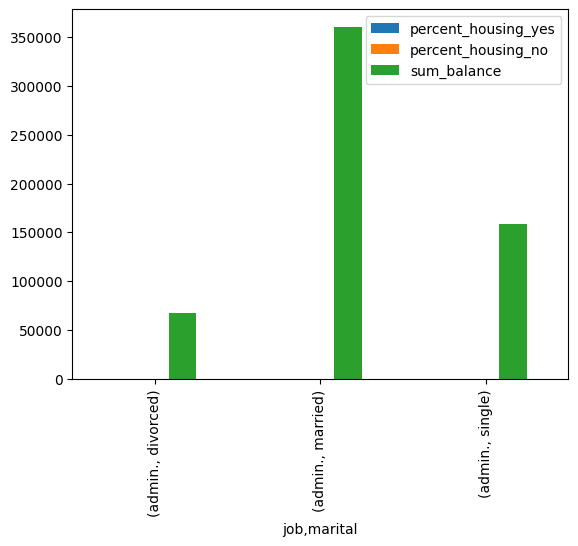

In [84]:
result_data.query('job == "admin."').plot(kind='bar')

<Axes: xlabel='job,marital'>

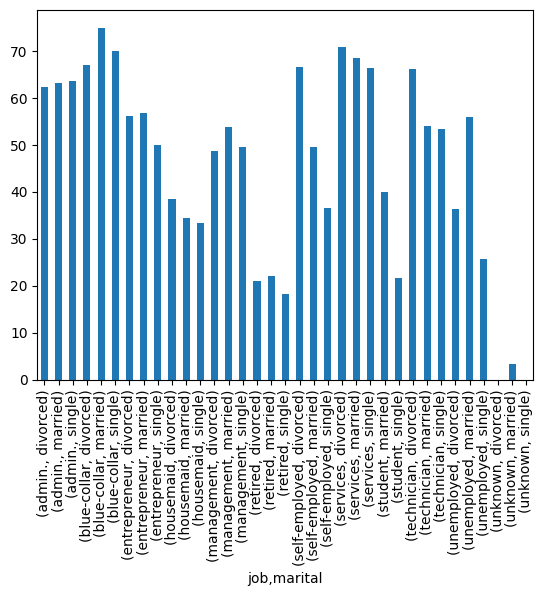

In [73]:
result_data['percent_housing_yes'].plot(kind='bar')

In [69]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [70]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [71]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Ver la relación entre las caracteristicas independientes y la variable objetivo (dependiente)
independent_variables = ['fuel_cons_comb', 'fuel_cons_hwy','fuel_cons_city' ]
target_variable = 'co2'
 
plt.figure(figsize=(6,10))
 
for i, var in enumerate(independent_variables):
    plt.subplot(3,1, i + 1)
    sns.regplot(x=df[var], y=df[target_variable])
    plt.title(f'{var} vs {target_variable}')
 
plt.tight_layout()
plt.show()+
 
# Ver la relación entre las caracteristicas independientes y la variable objetivo (dependiente)
independent_variables = ['fuel_cons_comb', 'fuel_cons_hwy','fuel_cons_city' ]
target_variable = 'co2'
 
plt.figure(figsize=(6,10))
 
for i, var in enumerate(independent_variables):
    plt.subplot(3,1, i + 1)
    sns.regplot(x=df[var], y=df[target_variable])
    plt.title(f'{var} vs {target_variable}')
 
plt.tight_layout()
plt.show()
 